<a href="https://colab.research.google.com/github/Harshithchinta24/cs666student/blob/main/CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

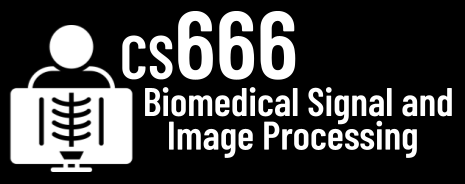

# Assignment 1

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (5 pts): Install the BioSPPY library with the following code.

In [2]:
!pip install biosppy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.2/142.2 kB 3.6 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [3]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [4]:
SAMPLING_RATE = metadata['sampling_rate']
SECONDS = len(signal) / SAMPLING_RATE

**Task 4** (15 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [5]:
from biosppy import signals
out = signals.ecg.ecg(signal=signal, sampling_rate=SAMPLING_RATE, show=False)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

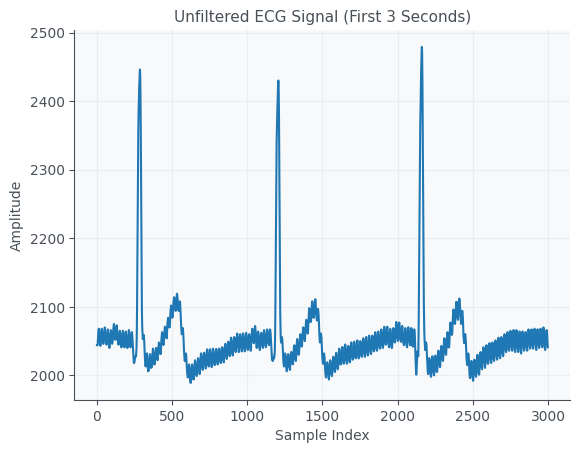

In [6]:
import matplotlib.pyplot as plt

# To get the first 3 seconds of the signal
signal_3sec = signal[:int(3 * SAMPLING_RATE)]

# To plot the first 3 seconds of the unfiltered signal
plt.figure()
plt.plot(signal_3sec)
plt.title('Unfiltered ECG Signal (First 3 Seconds)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

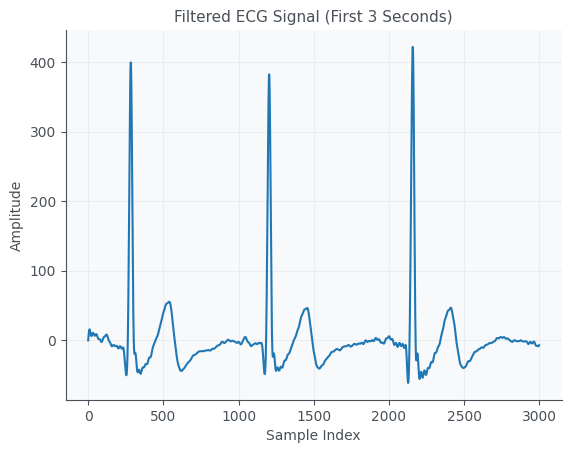

In [7]:
# To plot the first three seconds of the filtered signal
plt.figure()
plt.plot(out['filtered'][:int(3 * SAMPLING_RATE)])
plt.title('Filtered ECG Signal (First 3 Seconds)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

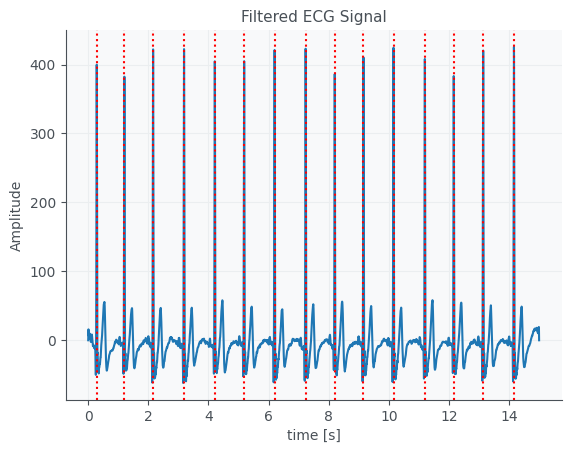

In [8]:
# To get the time values for the samples
time = [i/SAMPLING_RATE for i in range(len(signal))]

# To plot the filtered signal
plt.figure()
plt.plot(time, out['filtered'])
plt.title('Filtered ECG Signal')
plt.xlabel('time [s]')
plt.ylabel('Amplitude')

# To plot vertical lines at the R-peak locations
for r_peak in out['rpeaks']:
    plt.axvline(x=r_peak/SAMPLING_RATE, color='r', ls=':')

plt.show()

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [9]:
!pip install neurokit2
import neurokit2 as nk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.9 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

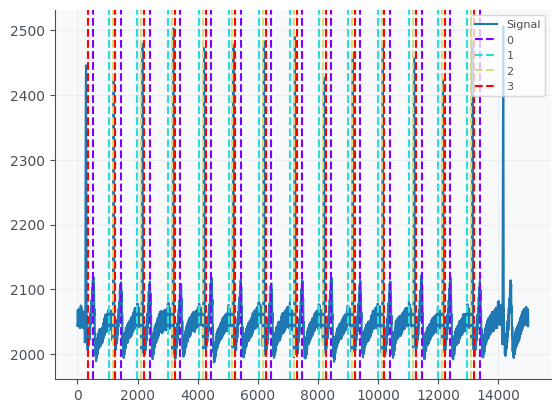

In [10]:
_, waves_peak = nk.ecg_delineate(signal, out['rpeaks'], sampling_rate=SAMPLING_RATE, method="peak")
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:],
                       waves_peak['ECG_P_Peaks'][:],
                       waves_peak['ECG_Q_Peaks'][:],
                       waves_peak['ECG_S_Peaks'][:]], signal)

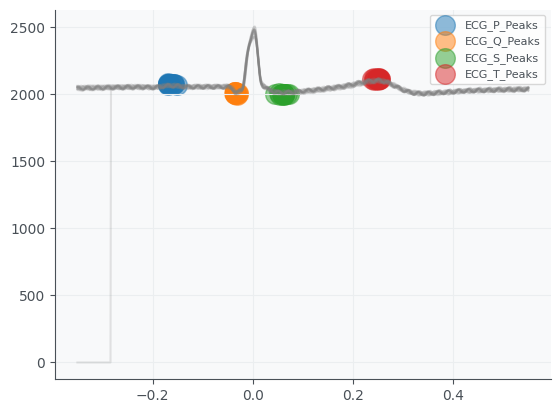

In [11]:
import warnings
warnings.filterwarnings('ignore')
_, waves_peak = nk.ecg_delineate(signal,
                                 out['rpeaks'],
                                 sampling_rate=SAMPLING_RATE,
                                 method="peak",
                                 show=True,
                                 show_type='peaks')

**Task 9** (10 pts): Use the sleepecg library to find the R Peaks.

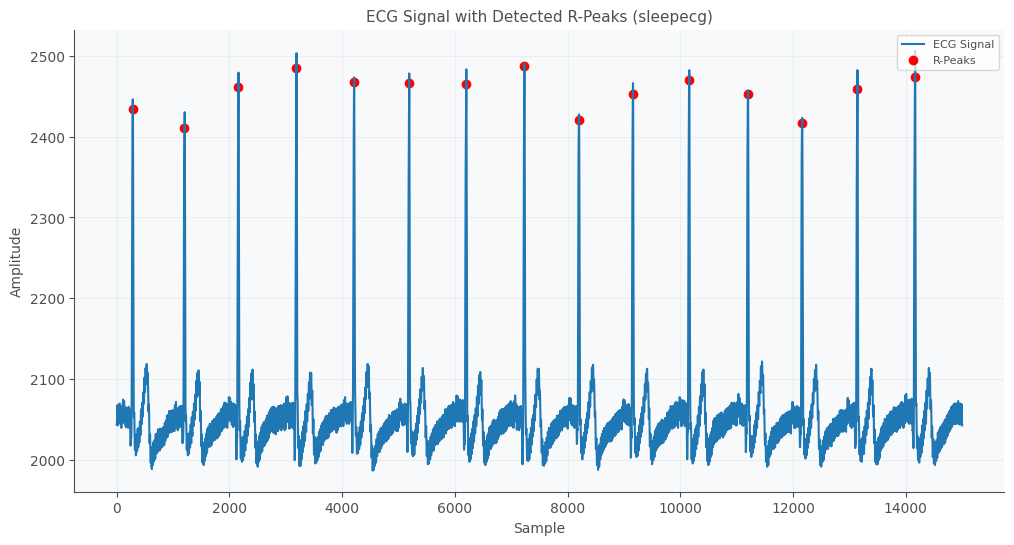

In [29]:
!pip install sleepecg
import sleepecg as secg
r_peaks = secg.detect_heartbeats(signal,SAMPLING_RATE)
plt.figure(figsize=(12, 6))
plt.plot(signal, label='ECG Signal')
plt.scatter(r_peaks, signal[r_peaks], color='red', label='R-Peaks')
plt.title('ECG Signal with Detected R-Peaks (sleepecg)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Do Biosppy and sleepecg give different rpeaks?
 # YES, THEY HAVE DIFFERENT R-PEAKS.


In [66]:

mse = np.mean((np.array(biosppy_rpeaks) - np.array(sleepecg_rpeaks))**2)

print(f'MSE: {mse}')


MSE: 2.5


**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

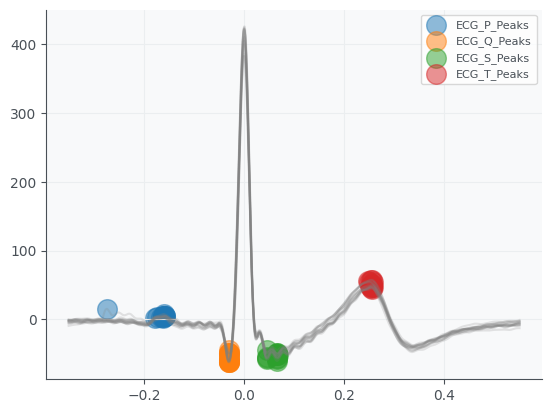

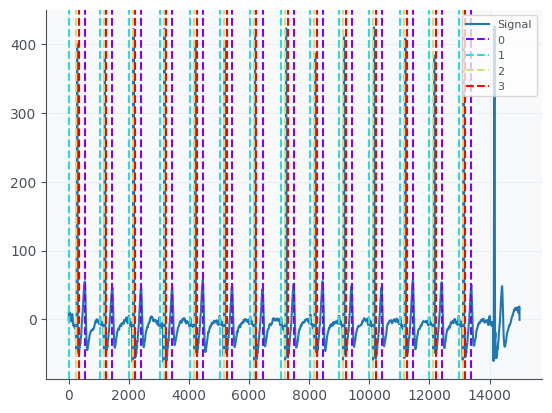

In [12]:
signal_filtered = out['filtered']
_, peaks_filtered = nk.ecg_delineate(signal_filtered, out['rpeaks'], sampling_rate=SAMPLING_RATE, method='peak', show_type='peaks', show=True)

plot = nk.events_plot([peaks_filtered['ECG_T_Peaks'][:],
                       peaks_filtered['ECG_P_Peaks'][:],
                       peaks_filtered['ECG_Q_Peaks'][:],
                       peaks_filtered['ECG_S_Peaks'][:]], signal_filtered)

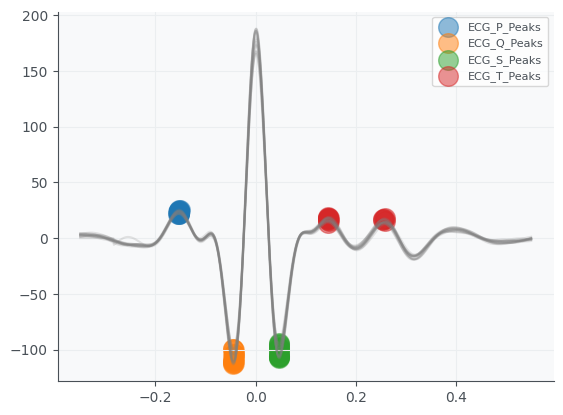

In [13]:
import numpy as np
import neurokit2 as nk

rpeaks = out["rpeaks"]

# Filter the signal
lowcut = 5
highcut = 15
signal_filtered = nk.signal_filter(signal, lowcut=lowcut, highcut=highcut, sampling_rate=SAMPLING_RATE, order=3)

# Detect P Q S T peaks for filtered signal
_, peaks_filtered = nk.ecg_delineate(signal_filtered, rpeaks, sampling_rate=SAMPLING_RATE, method='peak', show=True)

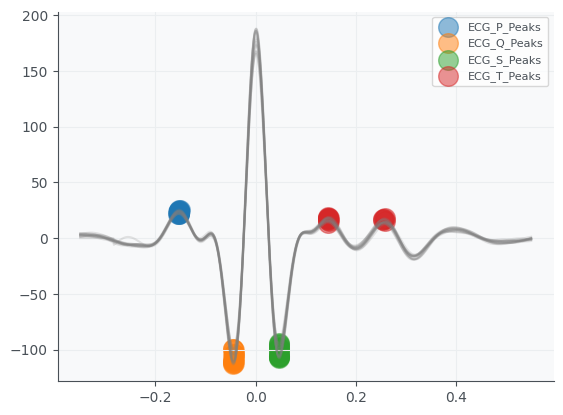

In [64]:
import numpy as np
import neurokit2 as nk

rpeaks = out["rpeaks"]

# Filter the signal
lowcut = 5
highcut = 15
signal_filtered = nk.signal_filter(signal, lowcut=lowcut, highcut=highcut, sampling_rate=SAMPLING_RATE, order=3)

# Detect P Q S T peaks for filtered signal
_, peaks_filtered = nk.ecg_delineate(signal_filtered, rpeaks, sampling_rate=SAMPLING_RATE, method='peak', show=True)

In [ ]:
# Which one works the best?
# I feel Neurokit2 library works more accurate.

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#